**Task 1** 

Импортируйте библиотеки pandas и numpy.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

Вычислите R2 полученных предсказаний с помощью r2_score из модуля sklearn.metrics.

In [242]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [243]:
boston = load_boston()
boston.keys()

D:\Programs\anaconda3\envs\My_ds_python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [244]:
data = boston['data']
target = boston['target']
feature_names = boston['feature_names']
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [245]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [246]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})
check_test

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
...,...,...
441,17.1,17.403672
23,14.5,13.385941
225,50.0,39.983425
433,14.3,16.682863


Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a 
 score of 0.0.

In [247]:
from sklearn.metrics import r2_score
R2 = r2_score(check_test['y_test'],check_test['y_pred'])
R2

0.7112260057484929

**Task 2**

Создайте модель под названием model с помощью класса RandomForestRegressor из модуля sklearn.ensemble.

Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [248]:
from sklearn.ensemble import RandomForestRegressor

In [249]:
model = RandomForestRegressor(n_estimators=1000,max_depth= 12, random_state = 42)

In [250]:
model.fit(X_train,y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [251]:
y_pred = model.predict(X_test)
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})
check_test

,y_test,y_pred
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521
...,...,...
441,17.1,13.521640
23,14.5,15.112621
225,50.0,42.808700
433,14.3,15.586103


In [252]:
R2 = r2_score(check_test['y_test'],check_test['y_pred'])
R2

0.87472606157312

Лучше работает RandomForestRegressor, чем линейная регрессия, т.к. точность в нашем случае примерно на 16 % выше

**Task 3** 

Вызовите документацию для класса RandomForestRegressor, найдите информацию об атрибуте feature_importances_.

С помощью этого атрибута найдите сумму всех показателей важности, установите, какие два признака показывают наибольшую важность.


In [253]:
feature_importances= pd.DataFrame({'feature_names' : feature_names,
             'feature_importances' : model.feature_importances_},
             columns=['feature_names','feature_importances'])
feature_importances

,feature_names,feature_importances
0,CRIM,0.031676
1,ZN,0.001543
2,INDUS,0.007138
3,CHAS,0.001236
4,NOX,0.014269
5,RM,0.402682
6,AGE,0.014299
7,DIS,0.063973
8,RAD,0.005281
9,TAX,0.011525


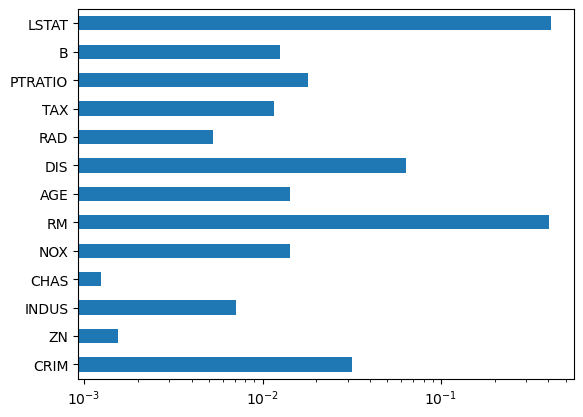

In [254]:
from matplotlib import pyplot as plt
df = pd.Series(index=feature_names, data = model.feature_importances_)
df.plot(kind="barh", logx=True)
plt.show()

In [255]:
feature_importances.nlargest(2, 'feature_importances')

,feature_names,feature_importances
12,LSTAT,0.415847
5,RM,0.402682


In [256]:
df.nlargest(2)

LSTAT    0.415847
RM       0.402682
dtype: float64

**Task 4**

В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.

Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.

Загрузите датасет creditcard.csv и создайте датафрейм df.
С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована. Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:

pd.options.display.max_columns = 100.

Просмотрите первые 10 строк датафрейма df.

Создайте датафрейм X из датафрейма df, исключив столбец Class.

Создайте объект Series под названием y из столбца Class.

Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: 
test_size=0.3, random_state=100, stratify=y.

У вас должны получиться объекты X_train, X_test, y_train и y_test.

Просмотрите информацию о их форме.

Для поиска по сетке параметров задайте такие параметры:

parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.

Обучите модель на тренировочном наборе данных (может занять несколько минут).
Просмотрите параметры лучшей модели с помощью атрибута best_params_.

Предскажите вероятности классов с помощью полученной модели и метода predict_proba.

Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.

Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.


In [257]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('creditcard.csv')

In [258]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [260]:
pd.options.display.max_columns = 100
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [261]:
X = df.drop(columns = ['Class'], inplace=False)
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [262]:
y = pd.Series(df['Class'])
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100,stratify=y)

In [264]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(199364, 30) (85443, 30) (199364,) (85443,)


In [265]:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

In [266]:
clf=GridSearchCV(estimator=RandomForestClassifier(random_state=100),
             param_grid=parameters,
             scoring='roc_auc',
             cv=3)


In [267]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [268]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [269]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
y_pred_proba

array([0.00092917, 0.00029521, 0.00028215, ..., 0.00028215, 0.0006822 ,
       0.01246098])

In [270]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9462664156037156

**Дополнительные задания**

1) Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.

In [271]:
from sklearn.datasets import load_wine
data = load_wine()

2) Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

In [272]:
data_keys = data.keys()
data_keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

3) Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.

In [273]:
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [274]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

4) Сколько классов содержит целевая переменная датасета? Выведите названия классов.

In [275]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

5) На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.

In [276]:
X = pd.DataFrame(data.data, columns=data.feature_names)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


6) Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

In [277]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

7) Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.

In [278]:
X['target'] = data.target
X['target'] = X['target'].astype(np.int8)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

8) Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

In [279]:
X_corr = X.corr()
X_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).

In [280]:
high_corr = X_corr.loc[(abs(X_corr['target']) > 0.5) & (X_corr.index != 'target'), X_corr.columns != 'target'].index
high_corr

Index(['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

10. Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.

In [281]:
X.drop(columns='target', inplace=True)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [282]:
for item in high_corr:
    X[f'{item}_2'] = X[item]**2

In [283]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,243.36,7.8400,9.3636,1.0816,15.3664,1134225.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,125.44,7.0225,7.6176,1.1025,11.5600,1102500.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,345.96,7.8400,10.4976,1.0609,10.0489,1404225.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,282.24,14.8225,12.1801,0.7396,11.9025,2190400.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,441.00,7.8400,7.2361,1.0816,8.5849,540225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,420.25,2.8224,0.3721,0.4096,3.0276,547600.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,529.00,3.2400,0.5625,0.4900,2.4336,562500.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,400.00,2.5281,0.4761,0.3481,2.4336,697225.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,400.00,2.7225,0.4624,0.3600,2.6244,705600.0
